In [2]:
import numpy as np
import matplotlib.pyplot as plt

### my library

import plots
import utils
import images
import distances
import transforms
import alignments

In [2]:
###



### Figure 1 - transforms



###

In [3]:
digit = 2
L = 65

### load original mnist test set data
mnist_image_file = 'Data/t10k-images-idx3-ubyte.gz'
mnist_label_file = 'Data/t10k-labels-idx1-ubyte.gz'

mnist_images = utils.load_mnist_images(mnist_image_file)
mnist_labels = utils.load_mnist_labels(mnist_label_file)

loc = np.argwhere(digit == mnist_labels).flatten()
digit_images = mnist_images[loc]
digit_images = utils.zero_pad_image_stack_to_size(digit_images, L)  # zero pad images to ensure bounded by disk

a_gt = 270
imgs = np.array([digit_images[0], utils.rotate(digit_images[1], a_gt)]) 
imgs = images.Image(imgs).preprocess_images()

In [4]:
imgs_ft = np.fft.fftshift(np.fft.fft2(imgs[0]))
imgs_pft = transforms.Transform(imgs, apply_ramp=False).polar_nufft()
imgs_rt = transforms.Transform(imgs, apply_ramp=False).radon_transform()
imgs_cdf = transforms.Transform(imgs, apply_ramp=False).cdf_transform()
imgs_icdf = transforms.Transform(imgs, apply_ramp=False).inverse_cdf_transform()

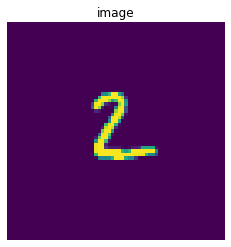

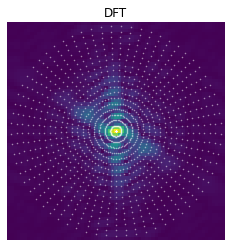

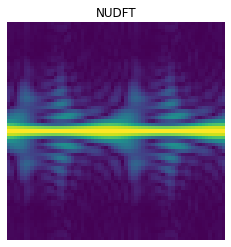

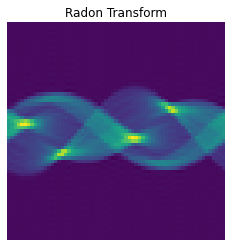

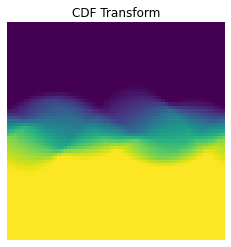

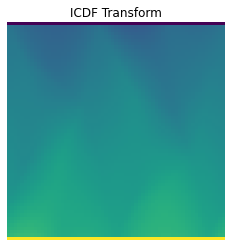

In [5]:
c = 'viridis'

plt.figure(figsize=(4,4))
plt.imshow(imgs[0], aspect='equal', cmap=c)
plt.axis('off')
plt.title('image')
# plt.savefig('Output/Figures/fig0_img.pdf')
plt.show()

angles = np.linspace(0, 360, 65, endpoint=False)
rads = angles / 180 * np.pi
y_idx = np.linspace(0, 33, 20, endpoint=False)
x_theta = y_idx[:, np.newaxis] * np.sin(rads)[np.newaxis, :]
x_theta = x_theta.flatten() + 32
y_theta = y_idx[:, np.newaxis] * np.cos(rads)[np.newaxis, :]
y_theta = y_theta.flatten() + 32
plt.figure(figsize=(4,4))
plt.imshow(abs(imgs_ft), aspect='equal', cmap=c)
# plt.imshow(utils.log_abs(imgs_ft), aspect='equal', cmap=c)
plt.scatter(x_theta, y_theta, color='white', s=0.3, alpha=0.5)
plt.axis('off')
plt.title('DFT')
# plt.savefig('Output/Figures/fig0_pft.pdf')
plt.show()

plt.figure(figsize=(4,4))
plt.imshow(abs(imgs_pft[0]), aspect='equal', cmap=c)
# plt.imshow(utils.log_abs(imgs_pft[0]), aspect='equal', cmap=c)
plt.axis('off')
plt.title('NUDFT')
# plt.savefig('Output/Figures/fig0_nufft.pdf')
plt.show()

plt.figure(figsize=(4,4))
plt.imshow(imgs_rt[0], aspect='equal', cmap=c)
plt.axis('off')
plt.title('Radon Transform')
# plt.savefig('Output/Figures/fig0_rt.pdf')
plt.show()

plt.figure(figsize=(4,4))
plt.imshow(imgs_cdf[0], aspect='equal', cmap=c)
plt.axis('off')
plt.title('CDF Transform')
# plt.savefig('Output/Figures/fig0_cdf.pdf')
plt.show()

plt.figure(figsize=(4,4))
plt.imshow(imgs_icdf[0], aspect='equal', cmap=c)
plt.axis('off')
plt.title('ICDF Transform')
# plt.savefig('Output/Figures/fig0_icdf.pdf')
plt.show()

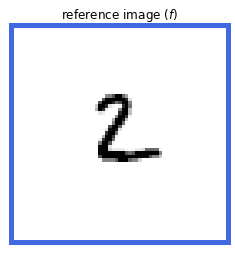

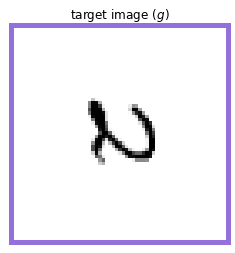

In [6]:
c1 = 'royalblue'
c2 = 'mediumpurple'

spine_color, spine_size = c1, 5
fig, ax = plt.subplots(1,1, figsize=(4,4))
plt.imshow(imgs[0], cmap='gray_r')
for side, spine in ax.spines.items():
    spine.set_color(spine_color)
    spine.set_linewidth(spine_size)
ax.get_yaxis().set_ticks([])
ax.get_xaxis().set_ticks([])
plt.title(r'reference image ($f$)')
# plt.savefig('')
plt.show()

spine_color, spine_size = c2, 5
fig, ax = plt.subplots(1,1, figsize=(4,4))
plt.imshow(imgs[1], cmap='gray_r')
for side, spine in ax.spines.items():
    spine.set_color(spine_color)
    spine.set_linewidth(spine_size)
ax.get_yaxis().set_ticks([])
ax.get_xaxis().set_ticks([])
plt.title(r'target image ($g$)')
# plt.savefig('')
plt.show()

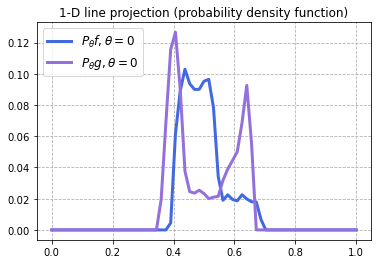

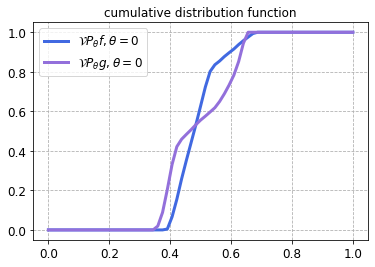

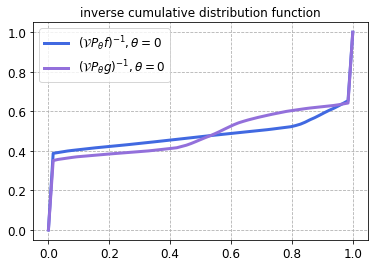

In [7]:
xgrid = np.linspace(0, 1, L, endpoint=True)

img1_pdf = imgs_rt[0, :, 0]
img2_pdf = imgs_rt[1, :, 0]

img1_cdf = imgs_cdf[0, :, 0]
img2_cdf = imgs_cdf[1, :, 0]

img1_icdf = imgs_icdf[0, :, 0]
img2_icdf = imgs_icdf[1, :, 0]

plt.figure(figsize=(6,4))
plt.plot(xgrid, img1_pdf, color=c1, linewidth=3, label=r'$P_\theta f, \theta=0$')
plt.plot(xgrid, img2_pdf, color=c2, linewidth=3, label=r'$P_\theta g, \theta=0$')
plt.title('1-D line projection (probability density function)')
# plt.xlabel('pixels')
# plt.ylabel('density')
plt.rc('axes', labelsize=12)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('legend', fontsize=12)
plt.grid(axis='both', linestyle='--')
plt.legend(loc='upper left')
# plt.axis('off')
# plt.savefig('/home/ev9102/ImageAlignment/FastAlignOT/Output/digit_pdf.pdf')
plt.show()


plt.figure(figsize=(6,4))
plt.plot(xgrid, img1_cdf, color=c1, linewidth=3, label=r'$\mathcal{V}P_\theta f, \theta=0$')
plt.plot(xgrid, img2_cdf, color=c2, linewidth=3, label=r'$\mathcal{V}P_\theta g, \theta=0$')
plt.title('cumulative distribution function')
# plt.xlabel('pixels')
# plt.ylabel('CDF')
plt.rc('axes', labelsize=12)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('legend', fontsize=12)
plt.grid(axis='both', linestyle='--')
plt.legend(loc='upper left')
# plt.axis('off')
# plt.savefig('/home/ev9102/ImageAlignment/FastAlignOT/Output/digit_cdf.pdf')
plt.show()


plt.figure(figsize=(6,4))
plt.plot(xgrid, img1_icdf, color=c1, linewidth=3, label=r'$(\mathcal{V}P_\theta f)^{-1}, \theta=0$')
plt.plot(xgrid, img2_icdf, color=c2, linewidth=3, label=r'$(\mathcal{V}P_\theta g)^{-1}, \theta=0$')
plt.title('inverse cumulative distribution function')
# plt.xlabel('CDF')
# plt.ylabel('pixels')
plt.rc('axes', labelsize=12)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('legend', fontsize=12)
plt.grid(axis='both', linestyle='--')
plt.legend(loc='upper left')
# plt.axis('off')
# plt.savefig('/home/ev9102/ImageAlignment/FastAlignOT/Output/digit_icdf.pdf')
plt.show()

In [8]:
### signed sliced Wasserstein 
Up, Un = transforms.Transform(imgs, apply_ramp=True).signed_inverse_cdf_transform()
dist_signed_sw = distances.signed_rotational_distances(Up[0], Up[1], Un[0], Un[1])
angle_signed_sw = angles[np.argmin(dist_signed_sw)]

img1_aligned_ssw = utils.rotate(imgs[1], -angle_signed_sw)

### sliced Cramer
U = transforms.Transform(imgs, apply_ramp=False).cdf_transform()
dist_sc = distances.rotational_distances(U[0], U[1])
angle_sc = angles[np.argmin(dist_sc)]

img1_aligned_sc = utils.rotate(imgs[1], -angle_sc)

### Euclidean
dist_euclidean = distances.real_space_rotational_distance(imgs[0], imgs[1], angles)
angle_euclidean = angles[np.argmin(dist_euclidean)]

img1_aligned_euclidean = utils.rotate(imgs[1], -angle_euclidean)

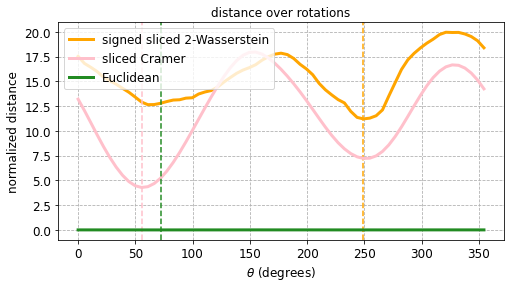

In [9]:
c3 = 'orange'
c4 = 'pink'
c5 = 'forestgreen'

plt.figure(figsize=(8,4))

plt.plot(angles, dist_signed_sw, color=c3, linewidth=3, label='signed sliced 2-Wasserstein')
# plt.plot(angles, dist_signed_sw / np.amax(dist_signed_sw), color=c3, linewidth=3, label='signed sliced 2-Wasserstein')
plt.axvline(angle_signed_sw, linestyle='--', color=c3)

plt.plot(angles, dist_sc, color=c4, linewidth=3, label='sliced Cramer')
# plt.plot(angles, dist_sc / np.amax(dist_sc), color=c4, linewidth=3, label='sliced Cramer')
plt.axvline(angle_sc, linestyle='--', color=c4)

plt.plot(angles, dist_euclidean, color=c5, linewidth=3, label='Euclidean')
# plt.plot(angles, dist_euclidean / np.amax(dist_euclidean), color=c5, linewidth=3, label='Euclidean')
plt.axvline(angle_euclidean, linestyle='--', color=c5)

plt.title('distance over rotations')
plt.ylabel('normalized distance')
plt.xlabel(r"$\theta$ " '(degrees)')
plt.rc('axes', labelsize=12)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('legend', fontsize=12)
plt.grid(axis='both', linestyle='--')
plt.legend(loc='upper left')
# plt.savefig('')
plt.show()

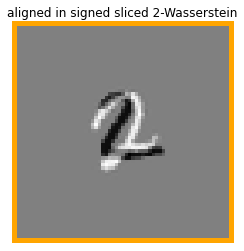

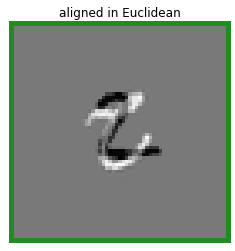

In [10]:
spine_color, spine_size = c3, 5
fig, ax = plt.subplots(1,1, figsize=(4,4))
plt.imshow(imgs[0] - img1_aligned_ssw, cmap='gray_r')
for side, spine in ax.spines.items():
    spine.set_color(spine_color)
    spine.set_linewidth(spine_size)
ax.get_yaxis().set_ticks([])
ax.get_xaxis().set_ticks([])
plt.title('aligned in signed sliced 2-Wasserstein')
# plt.savefig('')
plt.show()

# spine_color, spine_size = c4, 5
# fig, ax = plt.subplots(1,1, figsize=(4,4))
# plt.imshow(imgs[0] - img1_aligned_sc, cmap='gray_r')
# for side, spine in ax.spines.items():
#     spine.set_color(spine_color)
#     spine.set_linewidth(spine_size)
# ax.get_yaxis().set_ticks([])
# ax.get_xaxis().set_ticks([])
# plt.title('aligned in sliced 2-Cramer')
# # plt.savefig('')
# plt.show()

spine_color, spine_size = c5, 5
fig, ax = plt.subplots(1,1, figsize=(4,4))
plt.imshow(imgs[0] - img1_aligned_euclidean, cmap='gray_r')
for side, spine in ax.spines.items():
    spine.set_color(spine_color)
    spine.set_linewidth(spine_size)
ax.get_yaxis().set_ticks([])
ax.get_xaxis().set_ticks([])
plt.title('aligned in Euclidean')
# plt.savefig('')
plt.show()

In [13]:
digit = 2
L = 65

### load original mnist test set data
mnist_image_file = 'Data/t10k-images-idx3-ubyte.gz'
mnist_label_file = 'Data/t10k-labels-idx1-ubyte.gz'

mnist_images = utils.load_mnist_images(mnist_image_file)
mnist_labels = utils.load_mnist_labels(mnist_label_file)

loc = np.argwhere(digit == mnist_labels).flatten()
digit_images = mnist_images[loc]
digit_images = utils.zero_pad_image_stack_to_size(digit_images, L)  # zero pad images to ensure bounded by disk

a_gt = 270
imgs = np.array([digit_images[0], utils.rotate(digit_images[1], a_gt)]) 
imgs = images.Image(imgs).preprocess_images()

In [14]:
U = transforms.Transform(imgs, apply_ramp=True).radon_transform()
Up = np.where(U[0] > 0, U[0], 0)
Un = np.where(U[0] < 0, U[0], 0)

UC_p, UC_n = transforms.Transform(imgs, apply_ramp=True).signed_cdf_transform()

UI_p, UI_n = transforms.Transform(imgs, apply_ramp=True).signed_inverse_cdf_transform()

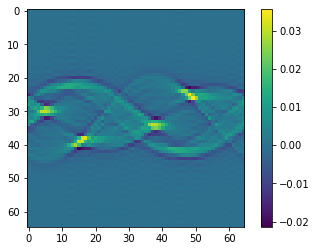

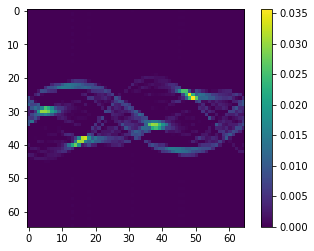

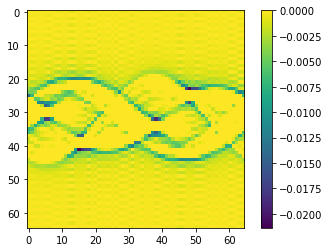

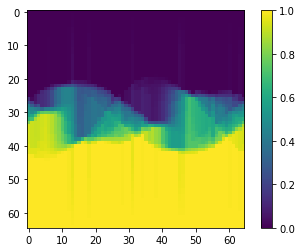

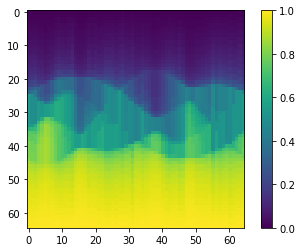

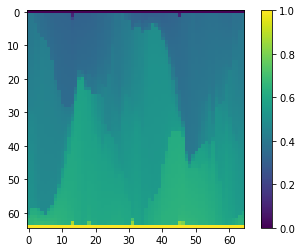

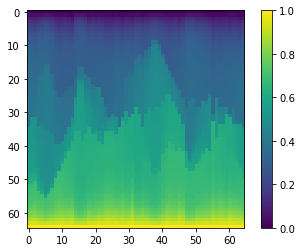

In [15]:
plt.imshow(U[0])
plt.colorbar()
plt.show()

plt.imshow(Up)
plt.colorbar()
plt.show()

plt.imshow(Un)
plt.colorbar()
plt.show()

plt.imshow(UC_p[0])
plt.colorbar()
plt.show()

plt.imshow(UC_n[0])
plt.colorbar()
plt.show()

plt.imshow(UI_p[0])
plt.colorbar()
plt.show()

plt.imshow(UI_n[0])
plt.colorbar()
plt.show()

In [11]:
###



### Figure 4 - tomographic projections



###

In [12]:
# import os
# import mrcfile

# DATA_DIR = '/scratch/network/ev9102/Data/'
# emd_id = 'emd_2660.map'  

# with mrcfile.open(os.path.join(DATA_DIR, emd_id)) as mrc:
#     volume = mrc.data
#     vox = mrc.voxel_size.x
#     mrc.close()
    
# imgs = np.array([np.sum(volume, axis=0), np.sum(volume, axis=0)])
# # imgs = np.where(imgs < 0, 0, imgs)
# imgs = images.Image(imgs).preprocess_images()

In [13]:
# c_viridis = plt.cm.viridis(np.linspace(0, 1, 4))
# colors = {'SW': c_viridis[0],
#           'wemd': c_viridis[1], 
#           'BF': c_viridis[2], 
#           'W2': c_viridis[3]
#          }

# ### replace this with actual rot matrix code to check distribution
# np.random.seed(0)

# phis = np.random.uniform(0, 180, 500)
# phis[0] = 0
# phis[1] = 180

# phis = np.round(phis)

# sw = np.sort(phis)[:10]
# wemd = np.sort(phis)[5:15]
# bf = np.sort(phis)[8:18]

# plt.figure(figsize=(30,10))

# bins = np.arange(0, 182)

# plt.hist(phis, bins=bins, color='gray', rwidth=0.5, ec='k', alpha=0.3, align='left')
# plt.hist(bf, bins=bins, color=colors['BF'], rwidth=0.5, ec='k', alpha=0.7, align='left', label='Euclidean')
# plt.hist(wemd, bins=bins, color=colors['wemd'], rwidth=0.5, ec='k', alpha=0.7, align='left', label='Wavelet EMD')
# plt.hist(sw, bins=bins, color=colors['SW'], rwidth=0.5, ec='k', alpha=0.7, align='left', label='Sliced 2-Wasserstein')

# plt.xlim(-1, 181)
# plt.xticks(np.arange(0, 181, 10), rotation=0)
# plt.rc('xtick', labelsize=16)
# plt.rc('ytick', labelsize=16)
# plt.rc('legend', fontsize=16)
# plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))
# plt.grid(which='major', linestyle='--')
# plt.legend(loc='upper right')
# plt.show()

In [14]:
# import numpy as np
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D

# # Generate the sphere
# phi, theta = np.mgrid[0:np.pi:100j, 0:2*np.pi:100j]
# x = np.sin(phi) * np.cos(theta)
# y = np.sin(phi) * np.sin(theta)
# z = np.cos(phi)


# # Create the figure
# fig = plt.figure(figsize=(10, 8))
# ax = fig.add_subplot(111, projection='3d')

# # Plot the sphere surface
# ax.plot_surface(x, y, z, color='lightblue', alpha=0.8, edgecolor='w')

# # Plot the central slices (planes)
# # ax.plot_surface(x_slice, y, z, color='red', alpha=0.3)
# # ax.plot_surface(x, y_slice, z, color='green', alpha=0.3)
# # ax.plot_surface(x, y, z_slice, color='yellow', alpha=0.3)

# # Add lines passing through the origin
# line_length = 1.2  # Length of the lines
# # ax.plot([-line_length, line_length], [0, 0], [0, 0], color='black', lw=2, label='X-axis')
# # ax.plot([0, 0], [-line_length, line_length], [0, 0], color='black', lw=2, label='Y-axis')
# # ax.plot([0, 0], [0, 0], [-line_length, line_length], color='black', lw=2, label='Z-axis')

# # Add diagonal lines passing through the origin
# # diagonals = [
# #     ([-line_length, line_length], [-line_length, line_length], [0, 0]),
# #     ([-line_length, line_length], [line_length, -line_length], [0, 0]),
# #     ([0, 0], [-line_length, line_length], [-line_length, line_length]),
# #     ([0, 0], [-line_length, line_length], [line_length, -line_length]),
# #     ([-line_length, line_length], [0, 0], [-line_length, line_length]),
# #     ([-line_length, line_length], [0, 0], [line_length, -line_length]),
# #     ([-line_length, line_length], [0, 0], [line_length, -line_length]),
# #     ([-line_length, line_length], [0, 0], [line_length, -line_length])
# # ]

# # for x_vals, y_vals, z_vals in diagonals:
# #     ax.plot(x_vals, y_vals, z_vals, color='black', lw=1.5, linestyle='--')

# # # Set axis labels and equal scaling
# # ax.set_xlabel('X-axis')
# # ax.set_ylabel('Y-axis')
# # ax.set_zlabel('Z-axis')
# ax.set_box_aspect([1, 1, 1])

# # plt.legend()
# plt.axis('off')
# plt.show()